# Top 50 startups

Startup is the first phase of the company, it is founded or lead by entrepreneurs who develop some product or service according to need of society. Their are many things we need for a proper Startup like:
* Business plan / Idea
* Location
* Raw materials
* Market knowledge
* Right people

But one of the most importing things is funding for proper growth and expansion of the startup. We need to look investors , and the investors look for business plan and the future of the startup and the field or tech on which startup is focusing on. <br>
Here we have dataset from [Kaggle](https://www.kaggle.com/sudalairajkumar/indian-startup-funding) which has the info regarding different startups, their funding and investors. We explore it to know :
* Which are some biggest funded startups?
* What are the most popular industries for startups?
* Who are the biggest investors?
* Which Location is preffered for startups? 



In [29]:
!pip install squarify


In [30]:
# importing libs
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import re
import seaborn as sns
from wordcloud import WordCloud
import datetime as dt
import squarify


In [31]:
# reading the dataset
data=pd.read_csv('/content/startup_funding.csv',encoding='utf-8')

In [32]:
data.head(10)

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",NaN
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",NaN
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",NaN
5,6,13/01/2020,Pando,Logistics,"Open-market, freight management platform",Chennai,Chiratae Ventures,Series A,"90,00,000",NaN
6,7,10/01/2020,Zomato,Hospitality,Online Food Delivery Platform,Gurgaon,Ant Financial,Private Equity Round,"15,00,00,000",NaN
7,8,12/12/2019,Ecozen,Technology,Agritech,Pune,Sathguru Catalyzer Advisors,Series A,"60,00,000",NaN
8,9,06/12/2019,CarDekho,E-Commerce,Automobile,Gurgaon,Ping An Global Voyager Fund,Series D,"7,00,00,000",NaN
9,10,03/12/2019,Dhruva Space,Aerospace,Satellite Communication,Bengaluru,"Mumbai Angels, Ravikanth Reddy",Seed,"5,00,00,000",NaN


### Data exploring 

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3044 entries, 0 to 3043
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Sr No              3044 non-null   int64 
 1   Date dd/mm/yyyy    3044 non-null   object
 2   Startup Name       3044 non-null   object
 3   Industry Vertical  2873 non-null   object
 4   SubVertical        2108 non-null   object
 5   City  Location     2864 non-null   object
 6   Investors Name     3020 non-null   object
 7   InvestmentnType    3040 non-null   object
 8   Amount in USD      2084 non-null   object
 9   Remarks            419 non-null    object
dtypes: int64(1), object(9)
memory usage: 237.9+ KB


It can be seen from above that some of attributes have less value than others, it shows that their are some missing values. So,lets visualize which attributes have null value.

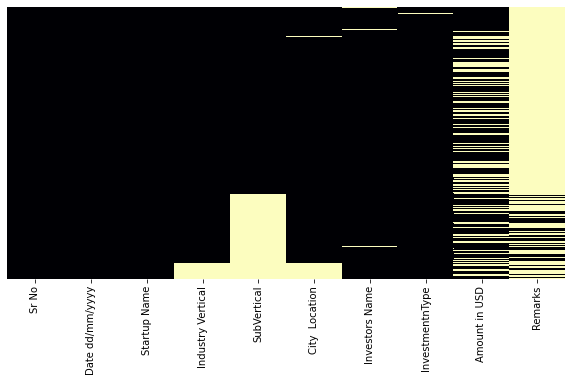

In [34]:
#visualizing the null values for each attribute
plt.figure(figsize=(10,5)) 
sns.heatmap(data.isnull(),cmap='magma',yticklabels=False,cbar=False)
plt.show()

Their are many missing values in the Revenue attribute and in `Remarks` attribute. Inorder to further process , lets see what are some non-null value in it.

In [35]:
#getting the unique value in Remark attribute.
data['Remarks'].unique()

array([nan, 'Pre-Series A', 'Series B', 'Series A', 'Series C',
       'Strategic Funding', 'Yet to Launch platform',
       'Series B (includes Debt financing)',
       'part of $40M Series B round',
       'Additional investment from parent company', 'pre-Series A',
       'Strategic Investment', 'Additional Funding', 'Yet to Launch',
       'Bridge funding', 'Funding happened in Sept 2015',
       'Pre-Series A Bridge', '2nd seed funding',
       'Series F ( More Details Here)', 'Late Stage',
       'Pre-Series A bridge round', 'Pre-Series A Bridge round',
       'Bridge Round', 'Strategic Funding (Series C)', 'Bridge Funding',
       'Strategic Investment (Majority Stake)',
       'Part of Series A raised in June 2015', 'Series D',
       'Part of $12M Series B funding', 'thru Accelerator',
       'late Stage (part of $500M funding rnd)',
       'Late Stage (Alibaba @ 40% equity)', 'Super angel round',
       'Late Stage Round 7th (More details)', 'pre Series-A',
       'Pre Series

### Data cleaning
Their are some strange words present in the dataset like: `\xc2` ,`\xa0` etc.. If we  search for it then we found those are the [unicode](https://www.codetable.net/hex/a0) symbols. <br>
Ex: "\xa0" represents 'no-break space'

In [36]:
# checking other attributes have those unicode symbol or not
# i am specifying some the row from 150-200 for showing
data['Industry Vertical'].unique()[150:200]

array(['Interface development platform for Government officials',
       'Modular Furnishings Marketplace',
       'Private Jet Bookings Marketplace',
       'Cab search Comparison & Booking platform',
       'Performance Optimization Platform for athletes',
       'Event Venue Booking Platform', 'Digital Media Platform',
       'visual search and discovery platform',
       'Home services marketplace',
       'End to End reverse logistics Solution platform',
       'Virtual Health consultation app', 'Online Renting platform',
       'Logistics Services Provider',
       'Data Science & UX design Learning platform',
       'Online marketplace for Chef Meals', 'Electric Bike Manufacturers',
       'ECommerce platform solutions', 'Online Media Publication',
       'International Hiring Platform',
       'Logistics Service Provider Marketplace',
       'Hyperlocal\\\\xc2\\\\xa0 Grocery Delivery Service',
       'Sports Education Platform',
       'Bike, Appliances Renting marketplace',
  

So first we need to remove these unicde for making some meaninful out of it. We can remove these using `regex` pattern from string, but before removing them we need to handle the null values.

In [37]:
#checking how many null values are their in `Amount in USD(Funding)` attribute
data[data['Amount in USD'].isnull()]

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
144,145,01/10/2018,Northmist,Fashion,Mens Wear,Delhi,Prashant Jaiswal,Seed/ Angel Funding,NaN,NaN
155,156,04/09/2018,HappyGoEasy,Consumer Internet,Online Travel Agecy,Gurugram,"Korea Investment Partners (KIP), Samsung and C...",Private Equity,NaN,NaN
157,158,05/09/2018,Mad Street Den,Technology,Computer Vision And Artificial Intelligence (A...,Chennai,KDDI\\xc2\\xa0,Private Equity,NaN,NaN
165,166,01/08/2018,HealthFin,Finance,Patient Financing Platform,Pune,"Axilor, Sprout Venture Partners and others",Seed/ Angel Funding,NaN,NaN
189,190,01/07/2018,Leena AI,Technology,HR Virtual Agent For Employees,Gurugram,Y Combinator,Seed/ Angel Funding,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
3027,3028,21/05/2015,Knit,NaN,NaN,NaN,"Rohit Jain, Amit Rambhia & Others",Seed Funding,NaN,NaN
3030,3031,22/01/2015,Freshmonk,NaN,NaN,NaN,"August Capital Partners, Michael Blakey",Seed Funding,NaN,NaN
3031,3032,22/01/2015,Englishleap.com,NaN,NaN,NaN,ANALEC,Private Equity,NaN,Majority Stake
3035,3036,24/01/2015,Impartus,NaN,NaN,NaN,Kaizen Private Equity,Private Equity,NaN,Series A


Their are any null value in `Amount in USD` attribute , their are many null values in other attributes, so we need to fill them as well.

In [38]:
#filling null value with "others" for attributes other than 'Amount in USD'.
data[1:-2].fillna('others',inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4327: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [39]:
data['Amount in USD'].unique()

array(['20,00,00,000', '80,48,394', '1,83,58,860', '30,00,000',
       '18,00,000', '90,00,000', '15,00,00,000', '60,00,000',
       '7,00,00,000', '5,00,00,000', '2,00,00,000', '1,20,00,000',
       '3,00,00,000', '59,00,000', '20,00,000', '23,10,00,000',
       '4,86,000', '15,00,000', 'undisclosed', '2,60,00,000',
       '1,74,11,265', '13,00,000', '13,50,00,000', '3,00,000',
       '22,00,00,000', '1,58,00,000', '28,30,00,000', '1,00,00,00,000',
       '4,50,00,000', '58,50,00,000', 'unknown', '45,00,000', '33,00,000',
       '50,00,000', '1,80,00,000', '10,00,000', '1,00,00,000',
       '45,00,00,000', '16,00,000', '14,00,00,000', '3,80,80,000',
       '12,50,00,000', '1,10,00,000', '5,10,00,000', '3,70,00,000',
       '5,00,000', '11,00,00,000', '1,50,00,000', '65,90,000',
       'Undisclosed', '3,90,00,00,000', '1,90,00,000', '25,00,000',
       '1,45,000', '6,00,00,000', '1,60,00,000', '57,50,000', '3,19,605',
       '48,89,975.54', '7,50,00,000', '27,39,034.68', '1,51,09,500.0

The `Amount in USD`(Funding) attribute has *undisclosed* and *unknown* value so we can remove them if they are less.

In [40]:
# checking how many values are presen with value undisclosed
data[(data['Amount in USD']=='undisclosed')]

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
20,21,17/11/2019,Burger Singh,Food and Beverage,Indian Burger Brand,Gurgaon,RB Investments,Venture,undisclosed,others
89,90,06/05/2019,Ola Electric,Transport,Cabs,Bengaluru,Tata Sons,Series A,undisclosed,others
91,92,05/05/2019,StyleDotMe,E-commerce,Fashion and Shopping,Delhi,Indian Angel Network and other angel investors...,Bridge Round,undisclosed,others


In [41]:
## checking how many values are presen with value unknown
data[(data['Amount in USD']=='unknown')]

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
34,35,21/10/2019,The Man Company,Consumer Goods,Beauty and Grooming,Gurgaon,Ayushmann Khurana,Corporate Round,unknown,others


In [42]:
data[(data['Amount in USD']=='Undisclosed')]

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
58,59,19/08/2019,Mishry Reviews,Services,Product Review,Gurgaon,Vir Sanghvi,Series A,Undisclosed,others
112,113,01/02/2019,FleetX,AI,Logistics,Gurgaon,India Quotient and LetsVenture\\xe2\\x80\\x99s...,Pre Series A,Undisclosed,others
139,140,22/11/2018,Skillbox,Social Network,Art,Gurugram,Individual investors,Seed Funding,Undisclosed,others


The number of non numerical value for `Amount in USD` attribute are 7 , so we can remove them.

In [43]:
data[data['Amount in USD'].isnull()]

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
3042,3043,30/01/2015,Simplotel,NaN,NaN,NaN,MakeMyTrip,Private Equity,NaN,"Strategic Funding, Minority stake"


Their are many null values in Funding attribute , i explore some of the sites to collect them like [crunchbase](https://www.crunchbase.com/) , but we have need the details regarding the investors , that how much a particular investor has fund in a particular startup , but the site does not contains it ,instead it contains the total funding a particular startup has , and the specific amount is not available on the other sites as well. Their are many ways to fill those values :
* By filling them with 0
* By filling them with avg <br>

But those would not help much , because the number of missing values are 1/3 of the total dataset and we try the model to predict the funding amount it would not work properly because we would have a lot of variance in it.So , instead we need to drop it for better prediction of funding amount.


In [44]:
# drop rows with non numerical funding amount 
data.drop(data.loc[(data['Amount in USD']=='undisclosed') | (data['Amount in USD']=='Undisclosed') | (data['Amount in USD'].isnull()) | (data['Amount in USD']=='unknown')].index,inplace=True)

In [45]:
data['Remarks'].fillna('None',inplace=True)

In [46]:
#replacing unneccesary word with others
data['Investors Name'].replace('undisclosed','others',inplace=True)

In [47]:
data.shape

(3036, 10)

In [48]:
#checking wheather we have processed all the null values
data.isnull().sum()

Sr No                0
Date dd/mm/yyyy      0
Startup Name         0
Industry Vertical    1
SubVertical          1
City  Location       1
Investors Name       0
InvestmentnType      0
Amount in USD        0
Remarks              0
dtype: int64

We still remain with null values so remove them by droping null value from dataframe

In [49]:
data.dropna(inplace=True)

In [50]:
data.shape

(3035, 10)

Now we can process those unicode symbol, here is the a example that how we regex to remove those symbols

In [51]:
t="sequoia capital, rohit bansal, kunal bahl, sandeep tandon, kunal shah, zishaan hayath,\\\ abhi"
t=re.sub(r"\\+","",t)
t

'sequoia capital, rohit bansal, kunal bahl, sandeep tandon, kunal shah, zishaan hayath, abhi'

To know more about the regex one can follow over [here](https://regexr.com)

In [52]:
# defining func for the removing of unicodes from each cell of dataframe
def unicode(x):
    x=re.sub(r"\\x..","",x)     ## removing unicode as it contains 2 char followed by '\x'
    x=re.sub(r"\\","",x)     ## removing the backslashes
    x=x.lower()                   ## lower the strings
    # print(x)
    return x.strip()

In [53]:
# process each cell of dataframe to remove unicode
for col in data.columns[1:]:
    data[col]=data[col].apply(unicode)

In [54]:
data

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
0,1,09/01/2020,byju’s,e-tech,e-learning,bengaluru,tiger global management,private equity round,"20,00,00,000",none
1,2,13/01/2020,shuttl,transportation,app based shuttle service,gurgaon,susquehanna growth equity,series c,"80,48,394",others
2,3,09/01/2020,mamaearth,e-commerce,retailer of baby and toddler products,bengaluru,sequoia capital india,series b,"1,83,58,860",others
3,4,02/01/2020,https://www.wealthbucket.in/,fintech,online investment,new delhi,vinod khatumal,pre-series a,"30,00,000",others
4,5,02/01/2020,fashor,fashion and apparel,embroiled clothes for women,mumbai,sprout venture partners,seed round,"18,00,000",others
...,...,...,...,...,...,...,...,...,...,...
3037,3038,27/01/2015,cardekho.com,others,others,others,"hillhouse capital, tybourne capital",private equity,"5,00,00,000",series b
3038,3039,28/01/2015,grabhouse.com,others,others,others,"kalaari capital, sequoia capital",private equity,"25,00,000",series a
3039,3040,29/01/2015,printvenue,others,others,others,asia pacific internet group,private equity,"45,00,000",others
3040,3041,29/01/2015,graphene,others,others,others,karsemven fund,private equity,"8,25,000",govt backed vc fund


Their are many char in `Amount in USD` like ',' ,  '+'  and 'n/a' , inorder to convert them to float datatype we need to remove these character.

In [55]:
# removing unnecessary char
data["Amount in USD"] = data["Amount in USD"].apply(lambda x:(str(x).replace(",","").replace("+","").replace(r'n/a',"others")))


In [56]:
data=data[data['Amount in USD']!='others']
data['Amount in USD']=pd.to_numeric(data['Amount in USD']) #converting funding attribute to numeric(float) type 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [57]:
data['Date dd/mm/yyyy'].unique()

array(['09/01/2020', '13/01/2020', '02/01/2020', '10/01/2020',
       '12/12/2019', '06/12/2019', '03/12/2019', '13/12/2019',
       '17/12/2019', '16/12/2019', '14/12/2019', '11/12/2019',
       '20/12/2019', '13/11/2019', '14/11/2019', '18/11/2019',
       '15/11/2019', '20/11/2019', '12/11/2019', '11/11/2019',
       '19/11/2019', '25/11/2019', '04/10/2019', '02/10/2019',
       '05/09/2019', '04/09/2019', '03/09/2019', '01/08/2019',
       '12/08/2019', '13/08/2019', '23/08/2019', '22/08/2019',
       '21/08/2019', '19/08/2019', '27/08/2019', '02/07/2019',
       '01/07/2019', '03/07/2019', '04/07/2019', '10/07/2019',
       '11/07/2019', '09/07/2019', '08/07/2019', '05/06/2019',
       '04/06/2019', '03/06/2019', '06/06/2019', '10/06/2019',
       '08/06/2019', '06/05/2019', '01/05/2019', '02/05/2019',
       '28/05/2019', '30/05/2019', '31/05/2019', '16/04/2019',
       '12/04/2019', '10/04/2019', '13/04/2019', '11/04/2019',
       '19/04/2019', '17/04/2019', '08/02/2019', '13/02

While converting the `Date` attribute from object to  datetime  i get some error regaring the char ,so i check the values we have in `Date` attribute. As we can see some of the dates do not have '/' some have '.' in it.<br>
Ex:  05/072018  ,   22/01//2015

In [58]:
#removing the '.' and replacing them with '/'
data['Date dd/mm/yyyy']=data['Date dd/mm/yyyy'].apply(lambda x: x.replace(".","/"))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [59]:
#converting some dates to their proper format
data['Date dd/mm/yyyy'].replace('22/01//2015','22/01/2015',inplace=True)
data['Date dd/mm/yyyy'].replace('01/07/015','01/07/2015',inplace=True)
data['Date dd/mm/yyyy'].replace('05/072018','05/07/2018',inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


### Data preprocessing

In [60]:
# getting some feature like 'date','month' and 'year' from Date.
data['year']=pd.to_datetime(data['Date dd/mm/yyyy'],format='%d/%m/%Y').dt.year
data['month']=pd.to_datetime(data['Date dd/mm/yyyy'],format='%d/%m/%Y').dt.month
data['day']=pd.to_datetime(data['Date dd/mm/yyyy'],format='%d/%m/%Y').dt.day

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [61]:
data["yearmonth"] = (pd.to_datetime(data['Date dd/mm/yyyy'],format='%d/%m/%Y').dt.year*100)+(pd.to_datetime(data['Date dd/mm/yyyy'],format='%d/%m/%Y').dt.month)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [62]:
# checking what kind of value does the 'City Location' have
data['City  Location'].unique()

array(['bengaluru', 'gurgaon', 'new delhi', 'mumbai', 'chennai', 'pune',
       'noida', 'faridabad', 'san francisco', 'san jose,', 'amritsar',
       'delhi', 'kormangala', 'tulangan', 'hyderabad', 'burnsville',
       'menlo park', 'gurugram', 'palo alto', 'santa monica', 'singapore',
       'taramani', 'andheri', 'chembur', 'nairobi', 'haryana', 'new york',
       'karnataka', 'mumbai/bengaluru', 'bhopal',
       'bengaluru and gurugram', 'india/singapore', 'jaipur', 'india/us',
       'nagpur', 'indore', 'new york, bengaluru', 'california', 'india',
       'ahemadabad', 'rourkela', 'bhubneswar', 'chandigarh',
       'delhi & cambridge', 'kolkata', 'coimbatore', 'bangalore',
       'udaipur', 'ahmedabad', 'surat', 'goa', 'gaya', 'vadodara',
       'missourie', 'panaji', 'gwalior', 'bangalore/ bangkok', 'kerala',
       'others', 'lucknow', 'trivandrum', 'sfo / bangalore',
       'pune/seattle', 'pune / dubai', 'bangalore / sfo', 'varanasi',
       'new delhi / us', 'mumbai / uk', 'k

Their are many cities which has 2 places mentioned , we can took one of them for making for visualizing as almost all of them contains city on left side of backslash and country on right side , so we go with cities as other locations are also the name of some cities and this is the same case for `InvestmentnType`.<br>
Ex: Seed/ Angel Funding, here the angel and seed Funding are same type of funding , more details can be found [here](https://www.investopedia.com/terms/a/angelinvestor.asp).
So we can remove the term seed from it.


In [63]:
# getting angel type of funding 
data['InvestmentnType']=data['InvestmentnType'].apply(lambda x: x.split("/")[-1])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [64]:
# getting the city name where we have 2 names available
data['City  Location']=data['City  Location'].apply(lambda x: x.split("/")[0].strip())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


from above we can also see that some of the cities like gurgaon and gurugram points to same locations, so we can map it to same kind of name.

In [65]:
## function to change those common city names
def map(x):
    if x=='gurugram':
        return 'gurgaon'
    elif x=='bengaluru':
        return 'bangalore'
    else:
        return x
data['City  Location']=data['City  Location'].apply(map)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [66]:
data

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks,year,month,day,yearmonth
0,1,09/01/2020,byju’s,e-tech,e-learning,bangalore,tiger global management,private equity round,200000000.0,none,2020,1,9,202001
1,2,13/01/2020,shuttl,transportation,app based shuttle service,gurgaon,susquehanna growth equity,series c,8048394.0,others,2020,1,13,202001
2,3,09/01/2020,mamaearth,e-commerce,retailer of baby and toddler products,bangalore,sequoia capital india,series b,18358860.0,others,2020,1,9,202001
3,4,02/01/2020,https://www.wealthbucket.in/,fintech,online investment,new delhi,vinod khatumal,pre-series a,3000000.0,others,2020,1,2,202001
4,5,02/01/2020,fashor,fashion and apparel,embroiled clothes for women,mumbai,sprout venture partners,seed round,1800000.0,others,2020,1,2,202001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3037,3038,27/01/2015,cardekho.com,others,others,others,"hillhouse capital, tybourne capital",private equity,50000000.0,series b,2015,1,27,201501
3038,3039,28/01/2015,grabhouse.com,others,others,others,"kalaari capital, sequoia capital",private equity,2500000.0,series a,2015,1,28,201501
3039,3040,29/01/2015,printvenue,others,others,others,asia pacific internet group,private equity,4500000.0,others,2015,1,29,201501
3040,3041,29/01/2015,graphene,others,others,others,karsemven fund,private equity,825000.0,govt backed vc fund,2015,1,29,201501


### Visualization
To answer our first question that **what are top 50 funded startup?** we visualise them by barplot

In [67]:
## creating new list to having startups with their total funding
topfiftystart=[]
for startup in data['Startup Name'].unique():
    df=data[data['Startup Name']==startup]    ## get the dataframe for each startup
    sum=np.sum(df['Amount in USD'])         ## sum total funding of startup
    topfiftystart.append([startup,sum])

startup=pd.DataFrame(topfiftystart,columns=['startup','Revenue'])  #converting the list to dataframe and sort them by the fundin amount
startup.sort_values(by='Revenue',ascending=False,inplace=True)

In [68]:
startup

,startup,Revenue
470,flipkart,4.059700e+09
55,rapido bike taxi,3.900000e+09
29,paytm,3.148950e+09
519,ola,9.845000e+08
31,udaan,8.700000e+08
...,...,...
1618,hostel dunia,1.600000e+04
1619,play your sport,1.600000e+04
1621,enabli,1.600000e+04
1622,cbs,1.600000e+04


In [69]:
data.shape

(2072, 14)

In [70]:
## diving amount by 1M to show data in term of Millions
startup['Revenue']/=1000000
startup=startup[:51]

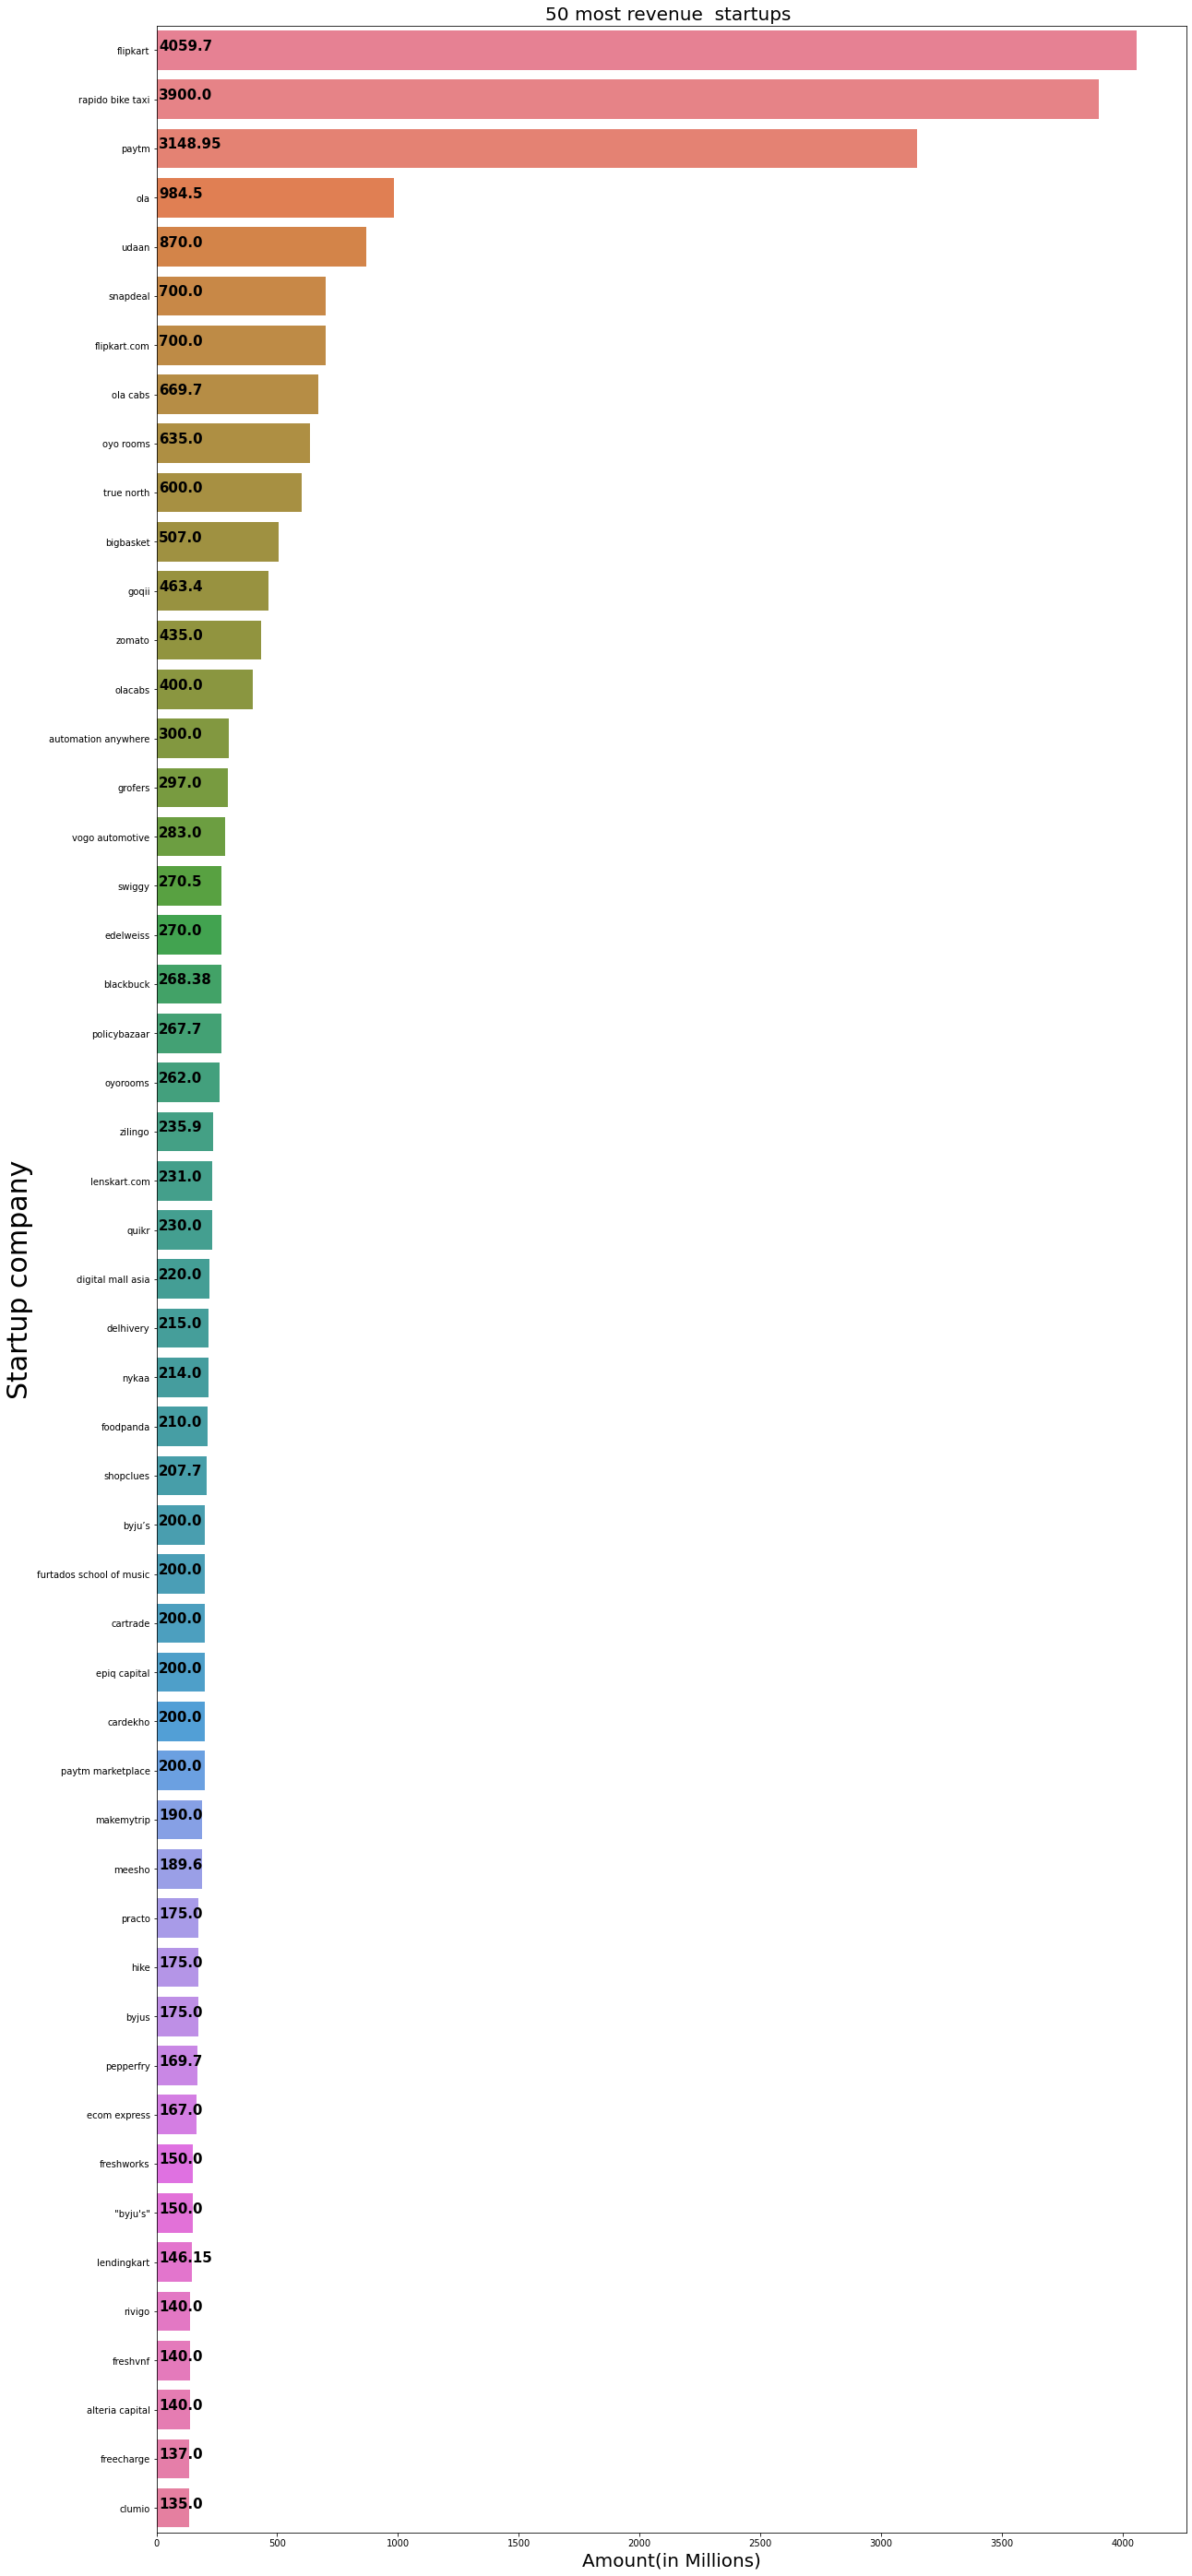

In [71]:
## visualising the amount spend on the top 50 startups
plt.figure(figsize=(20,50))
ax = sns.barplot(x="Revenue", y="startup",data=startup, palette="husl",linewidth = 2,label='big')
for i,j in enumerate(startup["Revenue"]):
    ax.text(10, i, j, weight="bold", color = 'black', fontsize =15,ha='left')
plt.title("50 most revenue  startups ",fontsize=20)
ax.set_xlabel(xlabel = 'Amount(in Millions)', fontsize = 20)
ax.set_ylabel(ylabel = 'Startup company', fontsize = 30)
plt.show()
del startup

We can see the top 50 highest funded startups and Flipkart is one of the biggest startup with the highest funded amount.

Now will see who are the biggest investors in the market.

In [72]:
company=data.copy()

In [73]:
company.sort_values(by='Amount in USD',ascending=False,inplace=True) ## sort the investor according to their fundings

In [74]:
company['Amount in USD']/=1000000
company=company[company['Investors Name']!='others']
company=company[:10]

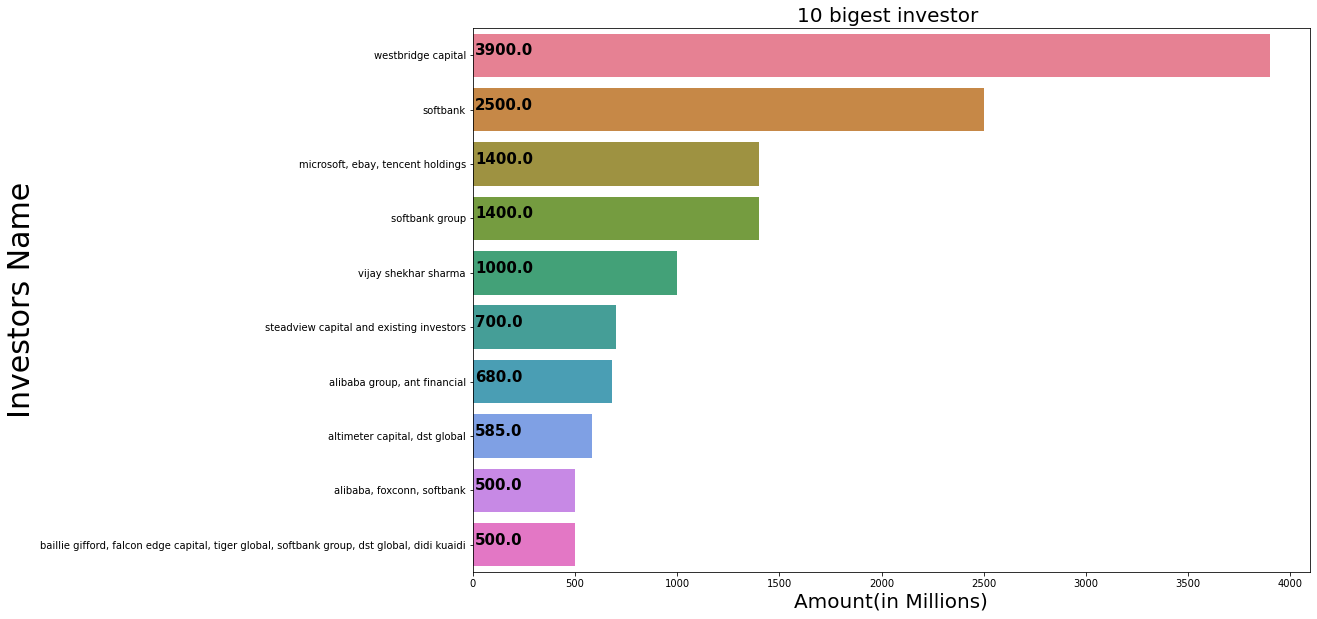

In [75]:
# visualizing the biggest investors
plt.figure(figsize=(15,10))
ax = sns.barplot(x="Amount in USD", y="Investors Name",data=company, palette="husl",linewidth = 2,label='big')
for i,j in enumerate(company["Amount in USD"]):
    ax.text(10, i, j, weight="bold", color = 'black', fontsize =15,ha='left')
plt.title("10 bigest investor ",fontsize=20)
ax.set_xlabel(xlabel = 'Amount(in Millions)', fontsize = 20)
ax.set_ylabel(ylabel = 'Investors Name', fontsize = 30)
plt.show()
del company

We can see the biggest investor for the startups and the biggest investors are `Westbridge capital` and `softbank`.


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


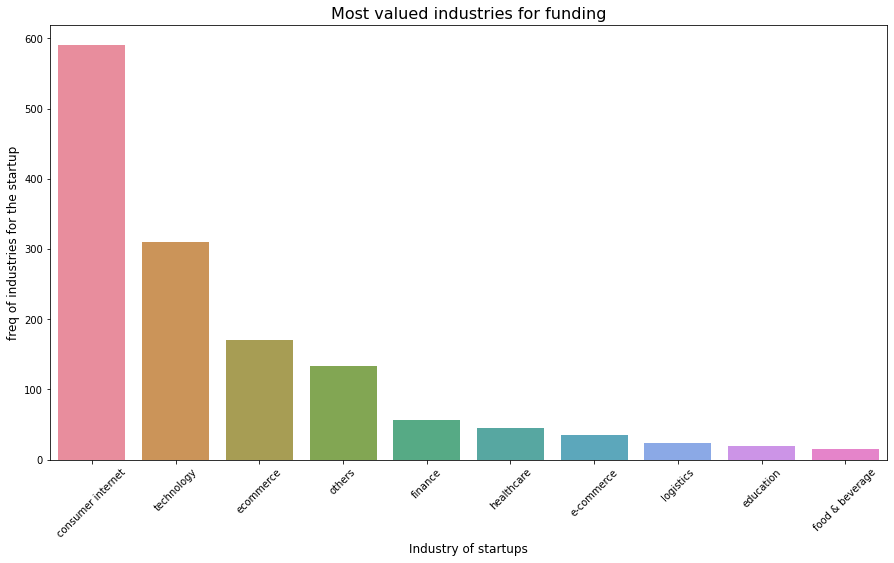

In [76]:
## visualizing the most valued industries prefered for funding 
industry = data['Industry Vertical'].value_counts().head(10)
plt.figure(figsize=(15,8))
sns.barplot(industry.index, industry.values, alpha=0.9, palette="husl")
plt.xticks(rotation=45)
plt.xlabel('Industry of startups', fontsize=12)
plt.ylabel('freq of industries for the startup', fontsize=12)
plt.title("Most valued industries for funding", fontsize=16)
plt.show()

Now we look wo are the most frequent investors in the market. If we see in the investors name then we can observe that their are some name like undisclosed, undisclosed investos , which represents nothing so we can put them under the category of 'others'.

In [77]:
## investor func to name undisclosed investors to others
def investor(x):
    x=x.strip()
    if x=='undisclosed' or x=='undisclosed investors' or x=='undisclosed investor':
        return 'others'
    else:
        return x
data["Investors Name"]=data["Investors Name"].apply(investor)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [78]:
# getting the names of investors
names = data[data['Investors Name']!='others']["Investors Name"]

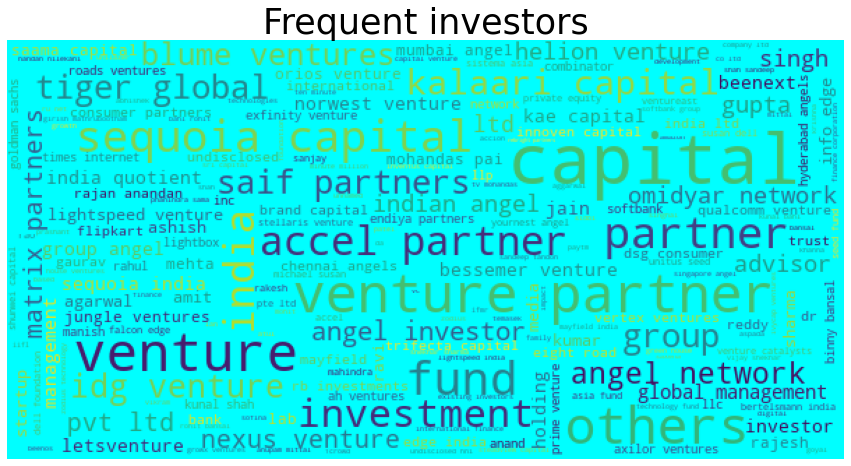

In [79]:
# creating the wordcloud to observe the most frequent investor
wordcloud = WordCloud(max_font_size=50, width=600, height=300, background_color='cyan').generate(' '.join(names))
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.title("Frequent investors", fontsize=35)
plt.axis("off")
plt.show()

From above we can see the investors who has invested more than one startups are :
* venture partner
* sequoia capital
* accesl partner

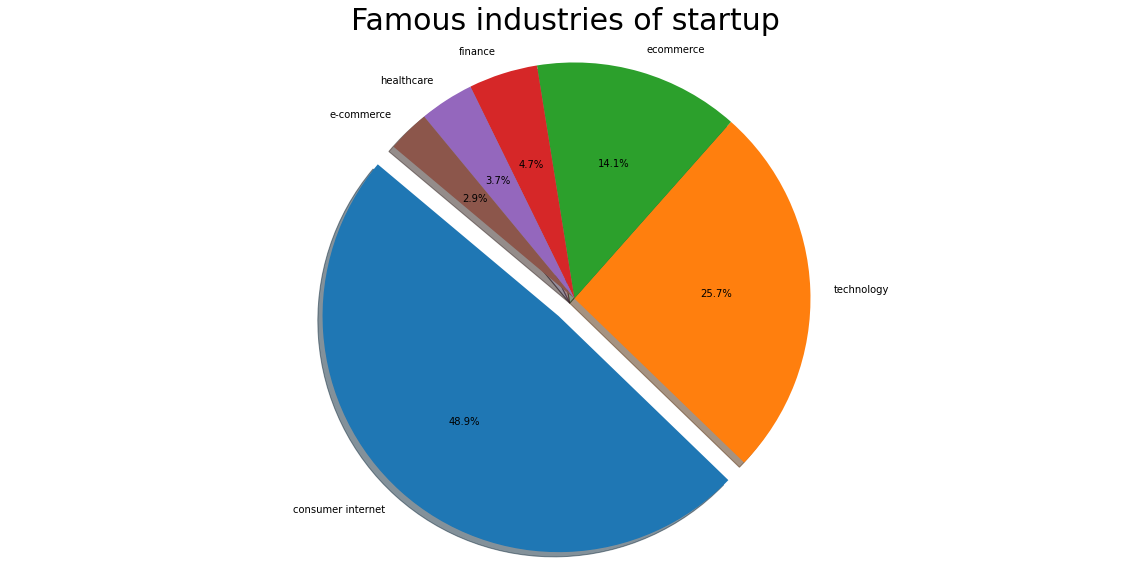

In [80]:
#in which sector there are most startups
d=data[data['Industry Vertical']!='others']['Industry Vertical'].value_counts().head(6)
explode = (0.1, 0, 0, 0,0,0)
fig1,ax1=plt.subplots(figsize=(20,10))

ax1.pie(d.values,explode=explode, labels=d.index,autopct='%1.1f%%', shadow=True, startangle=140)
ax1.axis('equal')
plt.title("Famous industries of startup",fontsize=30)
plt.show()

The most of the startups are based on:
* Consumer internet
* Technology
* e-commerce industries

Now we also look at what are the most preferred locations for the startups.

Text(0.5, 1.0, 'Distribution of Startups across Top cities')

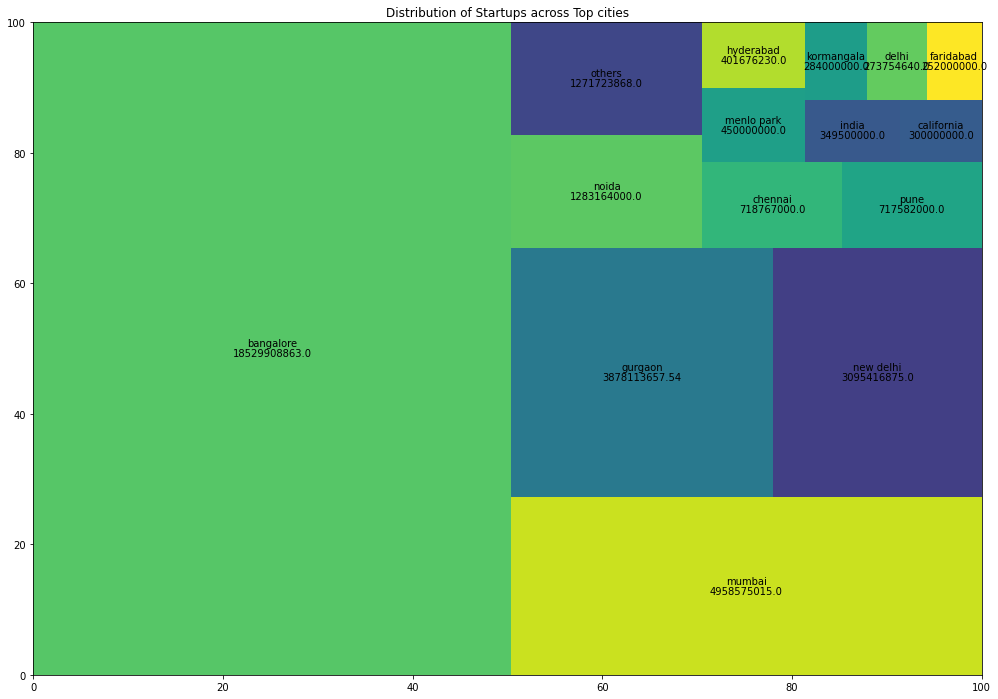

In [81]:
# plot the locations according to the funding given to the starups
plt.figure(figsize=(17,12))
mean_amount = data.groupby('City  Location').sum()["Amount in USD"].sort_values(ascending=False).head(15)
squarify.plot(sizes=mean_amount.values,label=mean_amount.index, value=mean_amount.values)
plt.title('Distribution of Startups across Top cities')

Banglore is  the most preffered industry for the startups , that's why we can also say that Banglore is the IT hub,  the location also matters so one should also think about the location in terms of funding and kind of industry statups are working on.

**Now we have answer to all the question we have mentioned at the starting**.

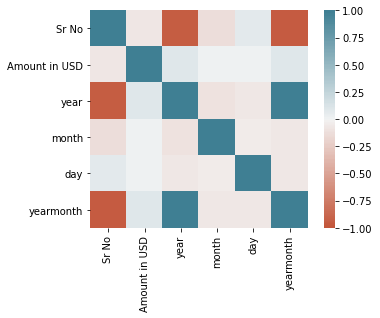

In [82]:
corr = data.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)

from above we can see that `Amount in USD` has less correlation with other attributes , so we need to find some more features for training.

### Feature engineering

In [83]:
data['Investors Name'].unique()

array(['tiger global management', 'susquehanna growth equity',
       'sequoia capital india', ..., 'asia pacific internet group',
       'karsemven fund', 'exfinity fund, growx ventures.'], dtype=object)

If we look at the names of investors then we can find that their are more than one investor for some of the startups and they are separated by ',' , so we can create a list of those names as to extract unique names form it.

In [84]:
data.columns

Index(['Sr No', 'Date dd/mm/yyyy', 'Startup Name', 'Industry Vertical',
       'SubVertical', 'City  Location', 'Investors Name', 'InvestmentnType',
       'Amount in USD', 'Remarks', 'year', 'month', 'day', 'yearmonth'],
      dtype='object')

To predict the Funding amount ,we need to have the features with numerical value because the system only understands the numbers.

So we have the attribute `City  Location` having the name of location for each startups. So we need to convert it to numerical value. If we look at the investors name then each of the startup have more than one investor, but need to focus more on the revenue and location. So , we will need to aggregate all the revenue for each startup and each need to list all the location for it.
Ex:

|Startup|Location|revenue|
|---|---|---|
|byju's|banglore|2000|
|mamearth|gurgram|3500|
|pandos|chennai|4000|
|byju's|gurugram|3000|
|mamearth|gurgram|2500|
|...|...|...|


then after aggregating the total revenue and list all the location we would left with:


|Startup|Location|revenue|
|---|---|---|
|byju's|\[banglore,gurugram\]|5000|
|mamearth|gurgram|6000|
|pandos|chennai|4000|
|...|...|...|

Then we can convert the list of location to [one hot enconding](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) to convert them to numerical value.


In [85]:
### aggregate the revenue as per the startup name 
## get the list of all locations 
for i,row in data.iterrows():
    data.at[i,'Location']=list(set(data[data['Startup Name']==row['Startup Name']]['City  Location'].values))
    data.at[i,'Revenue']=float(np.sum(data[data['Startup Name']==row['Startup Name']]['Amount in USD'].values))
    # print(row['Startup Name'])

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1758: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, v)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the

In [86]:
## remove the duplicate startups rows
data.drop_duplicates(subset='Startup Name',keep=False,ignore_index=True,inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [87]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()

In [88]:
##convert location to the one-hot  encoding
res = pd.DataFrame(mlb.fit_transform(data['Location']),columns=mlb.classes_,index=data['Location'].index)

In [89]:
res

,a,ahemadabad,ahmedabad,amritsar,b,bangalore,belgaum,bengaluru and gurugram,bhopal,bhubneswar,boston,burnsville,california,chandigarh,chembur,chennai,coimbatore,dallas,delhi,delhi & cambridge,e,faridabad,g,gaya,goa,gurgaon,gwalior,haryana,hyderabad,india,indore,jaipur,jodhpur,kanpur,karnataka,kerala,kolkata,kormangala,l,lucknow,missourie,mumbai,n,nagpur,nairobi,new delhi,new york,noida,o,others,panaji,pune,r,rourkela,san francisco,"san jose,",santa monica,sfo,singapore,surat,trivandrum,tulangan,udaipur,udupi,us,usa,vadodara,varanasi
0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1340,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1341,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1342,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1343,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [90]:
data=pd.concat([data,res],axis=1)  ## concatinating both the dataframe

In [91]:
data

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks,year,month,day,yearmonth,Location,Revenue,a,ahemadabad,ahmedabad,amritsar,b,bangalore,belgaum,bengaluru and gurugram,bhopal,bhubneswar,boston,burnsville,california,chandigarh,chembur,chennai,coimbatore,dallas,delhi,delhi & cambridge,e,faridabad,g,gaya,...,hyderabad,india,indore,jaipur,jodhpur,kanpur,karnataka,kerala,kolkata,kormangala,l,lucknow,missourie,mumbai,n,nagpur,nairobi,new delhi,new york,noida,o,others,panaji,pune,r,rourkela,san francisco,"san jose,",santa monica,sfo,singapore,surat,trivandrum,tulangan,udaipur,udupi,us,usa,vadodara,varanasi
0,1,09/01/2020,byju’s,e-tech,e-learning,bangalore,tiger global management,private equity round,200000000.0,none,2020,1,9,202001,bangalore,200000000.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,4,02/01/2020,https://www.wealthbucket.in/,fintech,online investment,new delhi,vinod khatumal,pre-series a,3000000.0,others,2020,1,2,202001,[new delhi],3000000.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,5,02/01/2020,fashor,fashion and apparel,embroiled clothes for women,mumbai,sprout venture partners,seed round,1800000.0,others,2020,1,2,202001,[mumbai],1800000.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,6,13/01/2020,pando,logistics,"open-market, freight management platform",chennai,chiratae ventures,series a,9000000.0,others,2020,1,13,202001,[chennai],9000000.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,8,12/12/2019,ecozen,technology,agritech,pune,sathguru catalyzer advisors,series a,6000000.0,others,2019,12,12,201912,[pune],6000000.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1340,3038,27/01/2015,cardekho.com,others,others,others,"hillhouse capital, tybourne capital",private equity,50000000.0,series b,2015,1,27,201501,[others],50000000.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1341,3039,28/01/2015,grabhouse.com,others,others,others,"kalaari capital, sequoia capital",private equity,2500000.0,series a,2015,1,28,201501,[others],2500000.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1342,3040,29/01/2015,printvenue,others,others,others,asia pacific internet group,private equity,4500000.0,others,2015,1,29,201501,[others],4500000.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1343,3041,29/01/2015,graphene,others,others,others,karsemven fund,private equity,825000.0,govt backed vc fund,2015,1,29,201501,[others],825000.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [92]:
# ## splitting the names of invstors separated by ','
# data['investors']=data['Investors Name'].apply(lambda x: set(x.split(',')))

In [93]:
# ## creating vocab for the unique names of investors
# investor=[]
# for each in data['investors']:
#     for i in each:
#         if i!="":
#             investor.append(i.strip())

# investor=list(set(investor))
# print(investor[:10])  

In [94]:
# # creating ranks for the names of investors vocab 
# investors={}
# i=1
# for inv in investor:a
#     investors[inv]=i
#     i+=1


In [95]:
# ## creating func val for mapping the sum of rank of investors name
# def val(x):
#     v=0
#     for i in x:
#         if i:
#             v+=investors[i.strip()]
#     return v

In [96]:
# ## applying func to map the names as the sum of rank of investors name
# data['investor val']=data['investors'].apply(val)

We need to now map the `Subvertical` to numerical value.
As it contains small discription of the Industry ,so we need to extract some important terms which has more value in a sentence.<br>
Ex: Online Marketplace For Mother and Babycare Products<br>
Here can see the word babycare , Marketplace and mother has more weightage than other words. One of the example is `google search engine`.<br>
To find this weightage of term we are using TF*IDF algo.<br>
1. TF(term frequencey)(t,d)=count of word t in the document(d)/number of words in d <br>
2. IDF(inverse document frequencey)= $\log (\frac{N}{df+1})$<br>
where N=occurence of term t in document set N <br>
df=occurences of term t in document set N.

TF-IDF=TF(t,d) x $\log (\frac{N}{df+1})$<br>
For more details click [here](https://towardsdatascience.com/tf-idf-for-document-ranking-from-scratch-in-python-on-real-world-dataset-796d339a4089)

I am using Sklearn for creating TF-IDF vectors.

In [97]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [98]:
data.columns

Index(['Sr No', 'Date dd/mm/yyyy', 'Startup Name', 'Industry Vertical',
       'SubVertical', 'City  Location', 'Investors Name', 'InvestmentnType',
       'Amount in USD', 'Remarks', 'year', 'month', 'day', 'yearmonth',
       'Location', 'Revenue', 'a', 'ahemadabad', 'ahmedabad', 'amritsar', 'b',
       'bangalore', 'belgaum', 'bengaluru and gurugram', 'bhopal',
       'bhubneswar', 'boston', 'burnsville', 'california', 'chandigarh',
       'chembur', 'chennai', 'coimbatore', 'dallas', 'delhi',
       'delhi & cambridge', 'e', 'faridabad', 'g', 'gaya', 'goa', 'gurgaon',
       'gwalior', 'haryana', 'hyderabad', 'india', 'indore', 'jaipur',
       'jodhpur', 'kanpur', 'karnataka', 'kerala', 'kolkata', 'kormangala',
       'l', 'lucknow', 'missourie', 'mumbai', 'n', 'nagpur', 'nairobi',
       'new delhi', 'new york', 'noida', 'o', 'others', 'panaji', 'pune', 'r',
       'rourkela', 'san francisco', 'san jose,', 'santa monica', 'sfo',
       'singapore', 'surat', 'trivandrum', 'tulanga

In [99]:
v = TfidfVectorizer(stop_words='english',analyzer='word',max_features=500) ## vector should create vector for 800 most weightage words
x = v.fit_transform(data['SubVertical'])

In [100]:
data.reset_index(drop=True,inplace=True) 

In [101]:
t=x.toarray()   # converting vector list to array

In [102]:
dt=pd.DataFrame(t)

In [103]:
dt

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.669973,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1340,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1341,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1342,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1343,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


In [104]:
df=pd.concat([data,dt],axis=1)   ## concatenating the tf-idf vectors with prevoius dataframe

We got remain with attributes : `Startup Name` ,`Industry Vertical`, `City  Location` and `InvestmentnType`. We can map the values to number like we have done with ranks dict created above for the investors name. <br>
I am using `LabelEncoder` for this.

In [105]:
from sklearn import preprocessing

In [106]:
le = preprocessing.LabelEncoder()

In [107]:
df['Startup Name']=le.fit_transform(df['Startup Name'])
df['Industry Vertical']=le.fit_transform(df['Industry Vertical'])
df['InvestmentnType']=le.fit_transform(df['InvestmentnType'])


In [108]:
## drop the non-featured attributes
df.drop(labels=['Date dd/mm/yyyy','Industry Vertical','SubVertical','Investors Name','yearmonth','Remarks','Amount in USD','Location','City  Location'],inplace=True,axis=1)

In [109]:
df

,Sr No,Startup Name,InvestmentnType,year,month,day,Revenue,a,ahemadabad,ahmedabad,amritsar,b,bangalore,belgaum,bengaluru and gurugram,bhopal,bhubneswar,boston,burnsville,california,chandigarh,chembur,chennai,coimbatore,dallas,delhi,delhi & cambridge,e,faridabad,g,gaya,goa,gurgaon,gwalior,haryana,hyderabad,india,indore,jaipur,jodhpur,...,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499
0,1,172,17,2020,1,9,200000000.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1,4,538,14,2020,1,2,3000000.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2,5,379,23,2020,1,2,1800000.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.669973,0.0,0.0,0.0,0.0
3,6,867,25,2020,1,13,9000000.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
4,8,329,25,2019,12,12,6000000.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1340,3038,185,16,2015,1,27,50000000.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1341,3039,466,16,2015,1,28,2500000.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1342,3040,931,16,2015,1,29,4500000.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1343,3041,470,16,2015,1,29,825000.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


In [110]:
df['Revenue']/=1000000


## Training model

As we need to predict the `Amount in USD` which is continuous value ,we can predict them with regression. Consider this Image:

<img src="./img/linear.png" width="500" height='400'>

The line fitting those datapoints has the equation , J(y_pred)= $\theta * X +b$<br>
J is also known as loss function<br>
b = intercept<br>
X= feature from the datapoints<br>
$\theta$= slope of the line

We can see that the line does not fit all the datapoints , and we can their is some error between each points and the line . We can find the total error by sum of square of those error i.e. $S=(y\_given^{i}-J^{i})^2$ <br>
and we use the square term because some of points above the line might have positive error and some of the points below the line has negaive error and we sum them we might get the actual error or the total error get decreased.<br>
Now the goal is that we use S to update the theta such that Sum of square error could be minized: <br>
$\theta= \theta - LR* \frac{dS}{d\theta}$<br>
$b=b-LR* \frac{dS}{db}$<br>
LR is learning rate at which the update the weights , one can visualise them as the  we do the [gradient descent](https://blog.clairvoyantsoft.com/the-ascent-of-gradient-descent-23356390836f) to find the global optimal. 

Some of these line get overfit the datasets i.e. high variance, one can also understand it like the Training model get well trained over the given dataset but might not perform well for new coming datapoints. So we address this problem using **Rigde regression**.

### Rigde regression (L2 regularization)
Consider the Image:

<img src="/img/ridge.png" width="500" height='400'>


Consider those red datapoints as the poitns from the training set , and the red line fit perfectly to those points but if try to predict new points(green points) then we get high variance from the red line. So we try to reduce this variance by introducing some bias to the sum of square error and get the new line which is represented by blue colour by reducing some variance.This provides a better long term prediction params. <br>
This introducing of some bias is also known as penalty(regularization term), <br>represented as =
$\lambda * {\theta}^2$<br>
$\theta$=penalty to loss function<br>
$\lambda$ represents how severe the penalty is

So the now our new loss function would become:<br>
$J= (y\_given-(\theta * X +b))^2+\lambda * {\theta}^2 $

<img src="/img/alpha.png" width="500" height='400'>

lambda is represented as alpha in the image.

As increase the lambda the slope of the regression line reduces and becomes more horizontal and the model becomes less sensitive to variation of the independent variable X , thus slope of the line is reduced and a small change in the X would have less impact in the change of Y and we can avoid the overfitting of the model.

Now the question arises how do chose the value of lambda?<br>
Ans:For this we will use k-fold cross validation.

### K-fold cross validation

Condider the dataset:

|sr.|X|Y|
|---|---|---|
|1|101|2|
|2|120|3|
|3|135|3|
|...|...|...|
|...|...|...|
|1000|256|8|

Lets say we divid the dataset into 5 parts i.e. k=5, so get the partion as:<br>
1st set have datapoints from \[1,2...200\]<br>
2nd set have datapoints from \[201,202...400\]<br>
3rd set have datapoints from \[401,402...600\]<br> 
4th set have datapoints from \[601,602...800\]<br>
5th set have datapoints from \[801,802...1000\]

Now make set 1-4 as train set and 5 as the test set and do this 4 more time for other sets as well, finally we would train our model over all the combination of test and train set and we get error from each of the combination say: E1,E2,E3,E4 and E5. We aggregate those results can conclude the final value of lambda which has the less error value in k-fold cross validation.

I am using sklearn for ridge regression

In [111]:
## importing the libraries
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from numpy import mean
from numpy import std
from numpy import absolute
import pickle

In [112]:
model= Ridge(normalize=True,alpha=0.1) ## normalize the value for faster convergence while gradient descent
cv = RepeatedKFold(n_splits=20, n_repeats=3, random_state=32)   # k-fold cross validation with k=20
scores = cross_val_score(model,df.loc[:, df.columns != 'Revenue'],df['Revenue'], scoring='neg_median_absolute_error', cv=cv, n_jobs=-1)
# force scores to be positive
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean MAE: 16.897 (3.265)


In [113]:
pickle.dump(model,open('ridge_reg.pkl','wb'))

We get the overall mean absolute error of 16.897 from our model.


Their are many features available after converting the text data to numerical value, their might be some features which are less useful while training the model ,so we can neglect of those features by introducing Lasso Regression.

### Lasso Regression(L1 Regression)
It is same as the Ridge Regression except the difference is that it uses norm instead of square for penalty term i.e:<br>
$\lambda * {|\theta|}$<br>
So our final function would be :
$J= (y\_given-(\theta * X +b))^2+\lambda * {|\theta|} $

How it affect the features?<br>
Consider The training model : <br>
<img src="./img/data.png">

When we train the model the using Ridge Regression ,it has the term ${\theta}^2$ as the penalty , and if see from above image we have many features in it. Some of the feature like `Location`,`startup name` might have value for our training model but some features like `489`,`402` ,`Sr.no.` etc. might not have much value/effect for our training model , so as we increase the lambda value the penalty for the Ridge Regression goes Asymptotically to 0 ,and those features remain in out training set with some less impact on the sum of squares error but the **Lasso Regression** has the norm term as penalty and as we increase the lambda then those less important features goes straight forward to 0 and those features has no effect for the trainig model and we obtain the model with less sum of squares of error than the Ridge Regression . Thus Lasso Regression perform better than Ridge Regression by remove the effect of some non useful features for the training model.

In [114]:
#importing lib for lasso regression
from sklearn import linear_model

In [115]:
 clf = linear_model.Lasso(alpha=0.1,normalize=True)
 cv = RepeatedKFold(n_splits=20, n_repeats=3, random_state=32)
scores = cross_val_score(clf,df.loc[:, df.columns != 'Revenue'],df['Revenue'], scoring='neg_median_absolute_error', cv=cv, n_jobs=-1)
# force scores to be positive
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean MAE: 7.701 (1.056)


From above we can see that the overall Mean absolute error by Lasso Regression is less than the Ridge Regression.

In [116]:
pickle.dump(clf,open('lasso_reg.pkl','wb'))

Conclusion:
* The most funded revenue startups are `Flipkart` and `Rapido ride taxi`
* The highest funded investores are `Westbridge capital` and `softbank`.
* The industry most preferred by investors for funding the startup are `Consumer internet` and `Technology`. The new startups should focus on these field for better funding and growth.
* And the most preffered location for the startups is Banglore .